# Statistical test #2

## 1. Use gaussian data to compare 4 data sets - equal valiance
> #### one-way ANOVA test
> #### Perform "post hoc" multiple pairwise comparison - Tukey HSD (honestly significant difference) / Tukey-Kramer procedure

## 2. Use gaussian data to compare 4 data sets - unequal valiance
> #### Kruskal-Wallis H Test (non parametric one way ANOVA)
> #### Perform post hoc multiple pairwise comparison

## 3. Use data from data.gov.sg
> #### Use Levene’s test to check the Homogeneity of variances
> #### Kruskal-Wallis H Test (non parametric one way ANOVA)
> #### Perform post hoc multiple pairwise comparison - Dunn's test 

In [1]:
# Example of data for one-way ANOVA
import pandas as pd
df = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/onewayanova.txt", sep="\t")
df

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


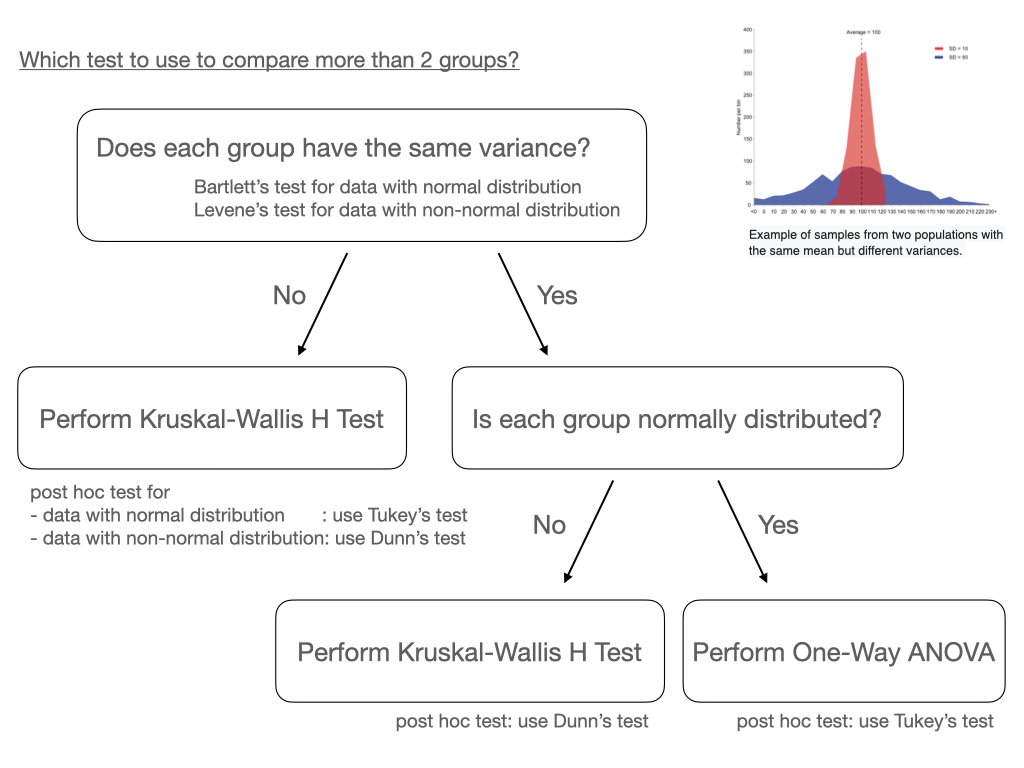

In [2]:
from PIL import Image

#read the image
im = Image.open("ANOVA-cheat-sheet.png")
im

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns

## 1. Use gaussian data to compare 4 data sets - equal valiance

In [5]:
# Preparing example data

np.random.seed(10)    # NumPy pseudo-random number generator. 
group1 = stats.poisson.rvs(loc=28, mu=35, size=50)
group2 = stats.poisson.rvs(loc=28, mu=30, size=50)
group3 = stats.poisson.rvs(loc=28, mu=38, size=50)
group4 = stats.poisson.rvs(loc=28, mu=40, size=80)

print( group1.mean() )
print( group2.mean() )
print( group3.mean() )
print( group4.mean() )

62.48
56.68
65.96
67.4375


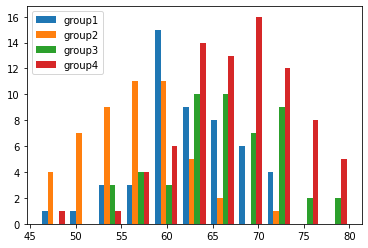

In [6]:
# Plot data
plt.hist((group1, group2, group3, group4), bins='auto')
plt.legend(['group1', 'group2', 'group3', 'group4'])
plt.show()

In [75]:
#plt.hist?

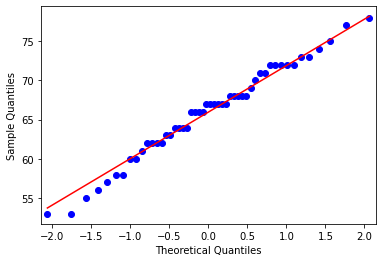

In [7]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
#data = group1
#data = group2
data = group3
#data = group4

# q-q plot
qqplot(data, line='s')
pyplot.show()

In [11]:
# Shapiro-Wilk Test for normality test
from scipy.stats import shapiro

# shapiro_test
# shapiro_test = shapiro(group1)
# shapiro_test = shapiro(group2)
#shapiro_test = shapiro(group3)
shapiro_test = shapiro(group4)
p = shapiro_test.pvalue
print('p=%.3f' % p)

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

p=0.691
Sample looks Gaussian (fail to reject H0)


### Use Bartlett’s test to check the Homogeneity of variances. 
> Null hypothesis: samples have equal variances.

In [12]:
import scipy.stats as stats
w, pvalue = stats.bartlett(group1, group2, group3, group4)
print(pvalue)
# If it is non significant (p > 0.05), it can be concluded that samples have equal variances.

0.716002881076298


In [15]:
# stats.bartlett?

### one-way ANOVA test
> - Data need to be a normal distribution.
> - Use one-way ANOVA test when the sample sizes are equal.
> - one-way ANOVA test can be performed when the sample sizes are not equal. However, there could be a potential issues. Read "How to Perform an ANOVA with Unequal Sample Sizes" (https://www.statology.org/anova-unequal-sample-size/). 

In [17]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
from scipy.stats import f_oneway

f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=39.780613996213695, pvalue=1.1100957725291176e-20)

In [19]:
# f_oneway?

### Reshape the dataframe suitable for statsmodels package 

In [27]:
dfg1 = pd.DataFrame(group1)
dfg1['Group'] = 'Group1'
dfg1.columns = ['Age', 'Group']
# or
# dfg1 = pd.DataFrame({'Age':group1, 'Group':'Group1'})

dfg2 = pd.DataFrame({'Age':group2, 'Group':'Group2'})
dfg3 = pd.DataFrame({'Age':group3, 'Group':'Group3'})
dfg4 = pd.DataFrame({'Age':group4, 'Group':'Group4'})

dfg1.head()

,Age,Group
0,68,Group1
1,65,Group1
2,63,Group1
3,57,Group1
4,56,Group1


In [28]:
df_all = pd.concat([dfg1, dfg2, dfg3, dfg4], axis=0)
df_all

,Age,Group
0,68,Group1
1,65,Group1
2,63,Group1
3,57,Group1
4,56,Group1
...,...,...
75,61,Group4
76,64,Group4
77,69,Group4
78,65,Group4


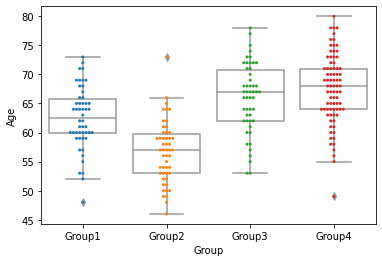

In [29]:
# ploting data
ax = sns.boxplot(x='Group', y='Age', data=df_all, color='white')
ax = sns.swarmplot(x="Group", y="Age", data=df_all, size=3)
plt.show()

### Perform "post hoc" multiple pairwise comparison - Tukey HSD (honestly significant difference) / Tukey-Kramer procedure
> - The data are normally distributed.
> - For data with equal sample size, use Tukey HSD. For unequal size, use Tukey–Kramer procedure.
> - Tukey–Kramer procedure, use Tukey HSD. When the samples are unequal variances, the Tukey-Kramer procedure is automatically used.
> - https://www.statology.org/tukey-test-python/
> - https://pingouin-stats.org/generated/pingouin.pairwise_tukey.html
> - https://www.itl.nist.gov/div898/handbook/prc/section4/prc4.htm

In [30]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=df_all['Age'], groups=df_all['Group'], alpha=0.05)
print(m_comp)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Group1 Group2     -5.8  0.001 -8.7636 -2.8364   True
Group1 Group3     3.48  0.014  0.5164  6.4436   True
Group1 Group4   4.9575  0.001  2.2861  7.6289   True
Group2 Group3     9.28  0.001  6.3164 12.2436   True
Group2 Group4  10.7575  0.001  8.0861 13.4289   True
Group3 Group4   1.4775 0.4816 -1.1939  4.1489  False
----------------------------------------------------


In [32]:
pairwise_tukeyhsd?

Signature: pairwise_tukeyhsd(endog, groups, alpha=0.05)
Docstring:
Calculate all pairwise comparisons with TukeyHSD confidence intervals

Parameters
----------
endog : ndarray, float, 1d
    response variable
groups : ndarray, 1d
    array with groups, can be string or integers
alpha : float
    significance level for the test

Returns
-------
results : TukeyHSDResults instance
    A results class containing relevant data and some post-hoc
    calculations, including adjusted p-value

Notes
-----
This is just a wrapper around tukeyhsd method of MultiComparison

See Also
--------
MultiComparison
tukeyhsd
statsmodels.sandbox.stats.multicomp.TukeyHSDResults
File:      ~/miniconda/envs/anaconda/lib/python3.8/site-packages/statsmodels/stats/multicomp.py
Type:      function


## 2. Use gaussian data to compare 4 data sets - unequal valiance

In [33]:
# Preparing example data

np.random.seed(10)    # NumPy pseudo-random number generator. 
group1 = stats.poisson.rvs(loc=38, mu=35, size=60)
group2 = stats.poisson.rvs(loc=28, mu=30, size=50)
group3 = stats.poisson.rvs(loc=18, mu=80, size=100)
group4 = stats.poisson.rvs(loc=29, mu=30, size=100)

print( group1.mean() )
print( group2.mean() )
print( group3.mean() )
print( group4.mean() )

71.85
57.74
97.79
58.32


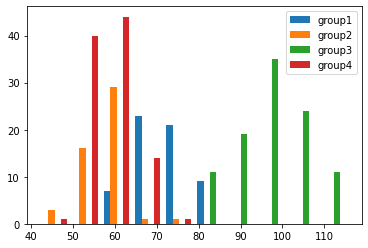

In [34]:
# Plot data
plt.hist((group1, group2, group3, group4), bins='auto')
plt.legend(['group1', 'group2', 'group3', 'group4'])
plt.show()

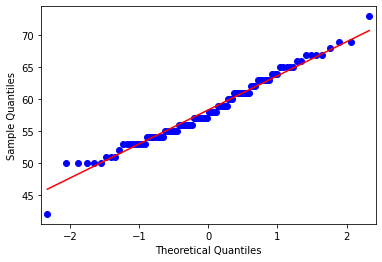

In [35]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
#data = group1
#data = group2
#data = group3
data = group4

# q-q plot
qqplot(data, line='s')
pyplot.show()

In [36]:
# Shapiro-Wilk Test for normality test
from scipy.stats import shapiro

# shapiro_test
#shapiro_test = shapiro(group1)
#shapiro_test = shapiro(group2)
#shapiro_test = shapiro(group3)
shapiro_test = shapiro(group4)
p = shapiro_test.pvalue
print('p=%.3f' % p)

# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p=0.196
Sample looks Gaussian (fail to reject H0)


### Use Bartlett’s test to check the Homogeneity of variances. 

In [37]:
import scipy.stats as stats
w, pvalue = stats.bartlett(group1, group2, group3, group4)
print(pvalue)
# If it is non significant (p > 0.05), it can be concluded that samples have equal variances.

2.89357568808314e-07


### Kruskal-Wallis H Test
> Kruskal-Wallis H Test is for the sample with unequal variances. Data can be normal or non-normal distribution.

In [38]:
from scipy import stats

#perform Kruskal-Wallis Test 
stats.kruskal(group1, group2, group3, group4)

KruskalResult(statistic=252.12736115379715, pvalue=2.268305758838926e-54)

### Reshape the dataframe suitable for statsmodels package 

In [39]:
dfg1 = pd.DataFrame(group1)
dfg1['Group'] = 'Group1'
dfg1.columns = ['Age', 'Group']

dfg2 = pd.DataFrame(group2)
dfg2['Group'] = 'Group2'
dfg2.columns = ['Age', 'Group']

dfg3 = pd.DataFrame(group3)
dfg3['Group'] = 'Group3'
dfg3.columns = ['Age', 'Group']

dfg4 = pd.DataFrame(group4)
dfg4['Group'] = 'Group4'
dfg4.columns = ['Age', 'Group']
dfg4.head()

,Age,Group
0,53,Group4
1,69,Group4
2,60,Group4
3,59,Group4
4,55,Group4


In [40]:
df_all = pd.concat([dfg1, dfg2, dfg3, dfg4], axis=0)
df_all

,Age,Group
0,78,Group1
1,75,Group1
2,73,Group1
3,67,Group1
4,66,Group1
...,...,...
95,55,Group4
96,58,Group4
97,59,Group4
98,63,Group4


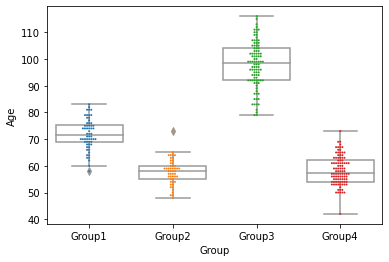

In [41]:
# ploting data
ax = sns.boxplot(x='Group', y='Age', data=df_all, color='white')
ax = sns.swarmplot(x="Group", y="Age", data=df_all, size=2)
plt.show()

### Perform "post hoc" multiple pairwise comparison - Tukey HSD (honestly significant difference) / Tukey-Kramer procedure
> - See the description above for more detail.

In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog=df_all['Age'], groups=df_all['Group'], alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
Group1 Group2   -14.11 0.001 -17.3389 -10.8811   True
Group1 Group3    25.94 0.001  23.1864  28.6936   True
Group1 Group4   -13.53 0.001 -16.2836 -10.7764   True
Group2 Group3    40.05 0.001  37.1294  42.9706   True
Group2 Group4     0.58   0.9  -2.3406   3.5006  False
Group3 Group4   -39.47 0.001 -41.8547 -37.0853   True
-----------------------------------------------------


# 3. Use data from data.gov.sg

## 3-1. Read data
> Read csv file "new-registration-of-cars-by-make.csv".

In [93]:
df = pd.read_csv('new-registration-of-cars-by-make.csv')
df

,month,make,fuel_type,vehicle_type,number
0,2016-01,ALPINA,Petrol,Hatchback,0
1,2016-01,ASTON MARTIN,Petrol,Hatchback,0
2,2016-01,B.M.W.,Others,Hatchback,0
3,2016-01,BENTLEY,Petrol,Hatchback,0
4,2016-01,CHEVROLET,Petrol,Hatchback,0
...,...,...,...,...,...
13060,2019-02,TOYOTA,Petrol,Coupe/ Convertible,0
13061,2019-02,TOYOTA,Diesel,Coupe/ Convertible,0
13062,2019-02,TOYOTA,Others,Coupe/ Convertible,0
13063,2019-02,VOLKSWAGEN,Diesel,Coupe/ Convertible,0


## 3-2. Select & plot data
> Select the "number" of new registration with 
>    1) make = 'TOYOTA' Excluding fuel_type 'Diesel', 
>    2) make = 'MERCEDES BENZ' Excluding fuel_type 'Diesel',
>    3) make = 'VOLKSWAGEN' Excluding fuel_type 'Diesel', and
>    4) make = 'PORSCHE' Excluding fuel_type 'Diesel'.

In [114]:
# selecting the number of new registration with make = '***' Excluding fuel_type 'Diesel'

toyota = df['number'][(df['fuel_type']!='Diesel') & (df['make']=='TOYOTA')]
mercedes = df['number'][(df['fuel_type']!='Diesel') & (df['make']=='MERCEDES BENZ')]

wagen = df['number'][(df['fuel_type']!='Diesel') & (df['make']=='VOLKSWAGEN')]
porsche = df['number'][(df['fuel_type']!='Diesel') & (df['make']=='PORSCHE')]

toyota
#porsche


41         0
217        0
233        1
266        5
279       10
        ... 
12843    180
12844    190
12850    400
13060      0
13062      0
Name: number, Length: 380, dtype: int64

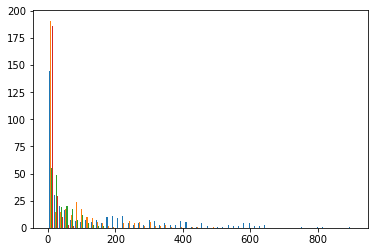

In [115]:
# Plot data
plt.hist((toyota, mercedes, wagen, porsche), bins='auto')
plt.show()

In [116]:
# Take into account the number of new registration more than 2

toyota = toyota[toyota>2]
mercedes = mercedes[mercedes>2]
wagen = wagen[wagen>2]
porsche = porsche[porsche>2]

#toyota
#porsche

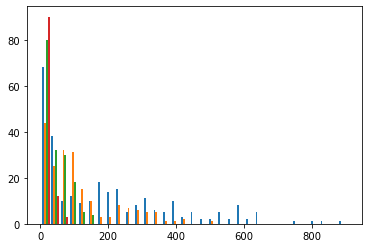

In [117]:
# Plot data
plt.hist((toyota, mercedes, wagen, porsche), bins='auto')
plt.show()

## 3-3. Check normal distribution

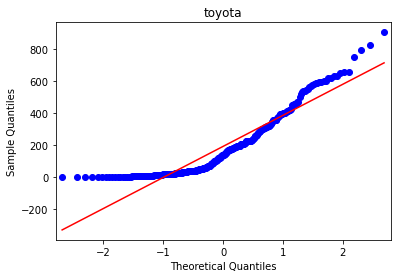

---
statistic=0.862; 5.01e-15;
Sample does not look Gaussian (reject H0)
-_-_-_-_-_-_-_-_-_-_



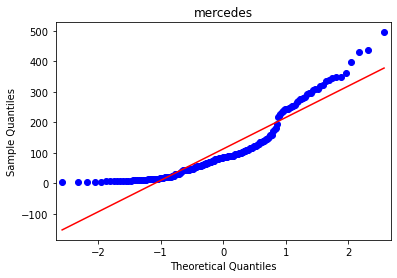

---
statistic=0.853; 6.29e-13;
Sample does not look Gaussian (reject H0)
-_-_-_-_-_-_-_-_-_-_



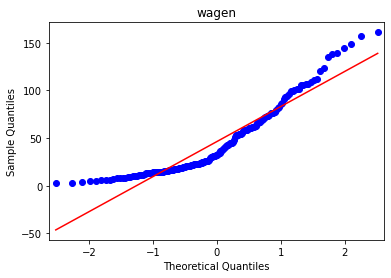

---
statistic=0.884; 3.61e-10;
Sample does not look Gaussian (reject H0)
-_-_-_-_-_-_-_-_-_-_



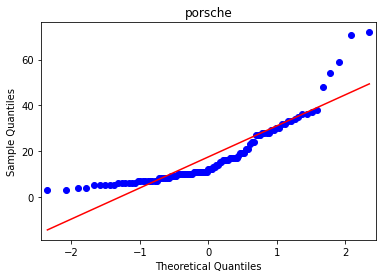

---
statistic=0.809; 2.36e-10;
Sample does not look Gaussian (reject H0)
-_-_-_-_-_-_-_-_-_-_



In [119]:
# QQ Plot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# Shapiro-Wilk Test for normality test
from scipy.stats import shapiro

# q-q plots
for d, d_name in zip([toyota, mercedes, wagen, porsche], ['toyota', 'mercedes', 'wagen', 'porsche']):
    qqplot(d, line='s')
    plt.title(d_name)
    pyplot.show()
    
    # shapiro_test
    shapiro_test = shapiro(d)
    print(f'---\nstatistic={shapiro_test.statistic:.3f}; {shapiro_test.pvalue:.3g};')
    
    # interpret
    alpha = 0.05
    if shapiro_test.pvalue > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
    print('-_'*10+'\n')

Statistics=0.852, p=0.000
Sample does not look Gaussian (reject H0)


> Note: Shapiro-Wilk Test does not work well this case. However, the data are clearly non-Gaussian.

## 3-4. Use Levene’s test to check the Homogeneity of variances. 
> stats.levene(sample1, sample2, …, center=’median’)

> center: Method to use for Levene’s test. The default is ‘median’.
> - ‘median’: recommended for skewed distributions.
> - ‘mean’: recommended for symmetric, moderate-tailed distributions.
> - ‘trimmed’: recommended for heavy-tailed distributions.

In [120]:
import scipy.stats as stats

w, pvalue = stats.levene(toyota, mercedes, wagen, porsche, center='median')
print(pvalue)

w, pvalue = stats.levene(toyota, mercedes, wagen, porsche, center='mean')
print(pvalue)

w, pvalue = stats.levene(toyota, mercedes, wagen, porsche, center='trimmed')
print(pvalue)

# If it is non significant (p > 0.05), it can be concluded that samples have equal variances.

3.144707608127913e-53
2.0586756947546142e-69
5.460125428076117e-73


## 3-5. Kruskal-Wallis H Test (non-parametric one-way ANOVA)
> Kruskal-Wallis H Test is for the sample with unequal variances. Data can be normal or non-normal distribution.

In [32]:
from scipy import stats

#perform Kruskal-Wallis Test 


KruskalResult(statistic=163.96380045629766, pvalue=2.5565369280498656e-35)

In [121]:
stats.kruskal(toyota, mercedes, wagen, porsche)

KruskalResult(statistic=185.6042807740357, pvalue=5.433727421730399e-40)

## 3-6. Reshape the dataframe suitable for statsmodels package 

In [128]:
df_toyota = pd.DataFrame({'Number':toyota, 'Make':'toyota'})


df_mercedes = pd.DataFrame({'Number':mercedes, 'Make':'mercedes'})


df_wagen = pd.DataFrame({'Number':wagen, 'Make':'wagen'})


df_porsche = pd.DataFrame({'Number':porsche, 'Make':'porsche'})

df_porsche.head()

,Number,Make
265,5,porsche
275,8,porsche
303,35,porsche
613,8,porsche
648,30,porsche


In [129]:
df_tmwp = pd.concat([df_toyota, df_mercedes, df_wagen, df_porsche], axis=0)
df_tmwp

,Number,Make
266,5,toyota
279,10,toyota
287,13,toyota
293,26,toyota
335,404,toyota
...,...,...
12484,10,porsche
12505,27,porsche
12775,6,porsche
12788,8,porsche


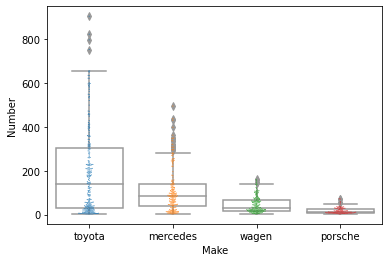

In [130]:
# ploting data
ax = sns.boxplot(x='Make', y='Number', data=df_tmwp, color='white')
ax = sns.swarmplot(x="Make", y="Number", data=df_tmwp, size=1)
plt.show()

## 3-7. post hoc Dunn test 
> Dunn’s Multiple Comparison Test is a post hoc non parametric test (a “distribution free” test that doesn’t assume your data comes from a normal distribution).

#### Note: We need to install a package "scikit-posthocs", first. For installattion, remove # and run "!pip install scikit-posthocs".

In [133]:
# install scikit_posthocs.
# !pip install scikit-posthocs

In [134]:
import scikit_posthocs as sp

pc = sp.posthoc_dunn(df_tmwp, val_col='Number', group_col='Make')
pc

,mercedes,porsche,toyota,wagen
mercedes,1.000000e+00,1.651023e-24,3.555614e-02,5.268403e-08
porsche,1.651023e-24,1.000000e+00,1.257351e-35,9.446090e-08
toyota,3.555614e-02,1.257351e-35,1.000000e+00,4.752368e-15
wagen,5.268403e-08,9.446090e-08,4.752368e-15,1.000000e+00


### Visualise the p-value
> - https://scikit-posthocs.readthedocs.io/en/latest/tutorial/

(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x7fc4b0903e20>)

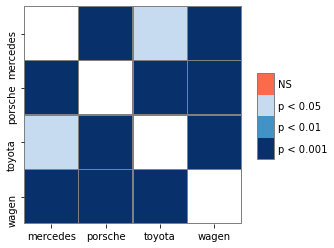

In [150]:
# Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05
cmap = ['1', '#fb6a4a',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

In [137]:
# sp.posthoc_dunn?

In [151]:
sp.sign_plot?

Signature:
sp.sign_plot(
    x: Union[List, numpy.ndarray, pandas.core.frame.DataFrame],
    g: Union[List, numpy.ndarray] = None,
    flat: bool = False,
    labels: bool = True,
    cmap: List = None,
    cbar_ax_bbox: List = None,
    ax: matplotlib.axes._subplots.SubplotBase = None,
    **kwargs,
) -> Union[matplotlib.axes._subplots.SubplotBase, Tuple[matplotlib.axes._subplots.SubplotBase, matplotlib.colorbar.Colorbar]]
Docstring:
Significance plot, a heatmap of p values (based on Seaborn).

Parameters
----------
x : Union[List, np.ndarray, DataFrame]
    If flat is False (default), x must be an array, any object exposing
    the array interface, containing p values. If flat is True, x must be
    a sign_array (returned by `scikit_posthocs.sign_array` function)

g : Union[List, np.ndarray]
    An array, any object exposing the array interface, containing
    group names.

flat : bool
    If `flat` is True, plots a significance array as a heatmap using
    seaborn. If `flat` is Fals